In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
api = wandb.Api()

Problem Statements
---------------------------

**Near mastery instability:**
Past runs have become unstable after reaching a success rate of above 95%, causing the success rate to drop significantly. We must find way to stabilize this behaviour.

**LR problem dependency:**
Suitable learning rates for policy and value net depend heavily on the task being learned. This makes it necessary to tune them manually for every new task.


Hypothesis:
-----------------
The learning rate becomes too large towards the end of the training of a task which causes the instability. We don't see a performance crash earlier on in the training, but a lower learning rate earlier on in the training might still be beneficial to training performance.

Approach:
---------------
Experiment with learning rate schedulers built into Torch.


Experient 1:
------------

Experiment with Torchs ExponentialLR scheduler 

In [10]:
runs = api.runs(
    path="cthoens/Workbook",
    filters={"tags": {"$in": ["ExponentialLR"]}}
)
SUCCESS_RATE  = "Sample Trajectories.Success Rate"
runs_dict = {run.name: [row[SUCCESS_RATE] for row in run.scan_history(keys=[SUCCESS_RATE])] for run in runs}

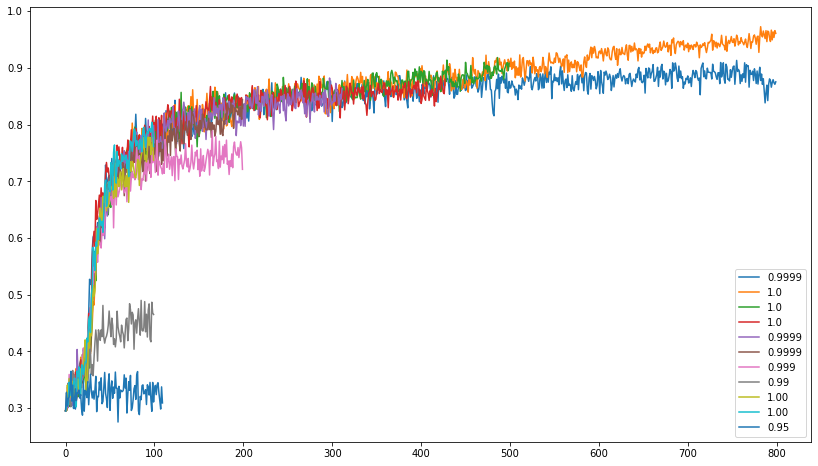

In [19]:
plt.rcParams["figure.figsize"] = [14, 8]
for key, values in runs_dict.items():
    plt.plot(values[:800], label=key.split("_")[0])
plt.legend()

Observation
-----------------

The experiment shows that a modest exponential  decay rate of 0.9999 (blue curve) leads to a significant reduction in training performance compare the using a constant learning rate (orange curve). This decay rate reduces the learning rate only to ~86% of the initial learning rate. 


Conclusion
----------------

Even modestly lowering the learning rate throughout the entire run has a noticalbly negatice effect on training performance, making the practice not adisable. It might still makes sense to start lowering the learning rate towards the end of the training. This would have to be investigated seperately.

Auxiliary
---------

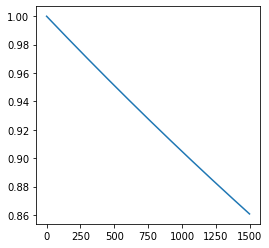

In [22]:
plt.rcParams["figure.figsize"] = [4, 4]
lr = np.zeros(1500)
current = 1.0
for i in range(len(lr)):
    lr[i] = current
    current *= 0.9999
    
plt.plot(lr)